# 목차
---

## 1. Missing, Outlier, Duplicated Values
## 3. Feature Engineering
## 4. EDA
## 5. Scaling, PCA
## 6. Modeling
## 7. 회고

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fraud_df = pd.read_csv('/aiffel/data/fraud.csv')

In [3]:
fraudtest_df = pd.read_csv('/aiffel/aiffel/fraudTest.csv')

In [4]:
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


## 1.1 Missing Values

In [5]:
fraud_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## 1.2 Duplicated Values

In [6]:
fraud_df[fraud_df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


결측값과 중복값 모두 없는 것으로 확인됩니다.

## 1.3 Outlier

In [7]:
fraud_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


### 1.3.1. amt 
현재 df은 통장 잔고가 아닌 신용카드 단일 거래 기록으로 보여지며 max값이 비정상적으로 높은 것으로 확인

<AxesSubplot:ylabel='amt'>

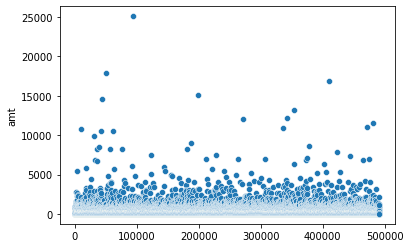

In [8]:
sns.scatterplot( x=fraud_df.index, y = fraud_df['amt'])

10000달러 이상 금액을 탐색하였을 때 모두 category는 travel로 높은 금액이 발생할 있을 것으로 보여집니다.<br/>
이상치로 예상되었던 25086.94를 결제한 Kenneth Foste씨는 직업이 Geoscientist로 직업 특성상 장기간 출장일정으로 높은 금액이 발생할 수도 있어 보류하겠습니다.

### 1.3.2. Gender

In [9]:
fraud_df['gender'].value_counts()

F    352445
M    138689
Name: gender, dtype: int64

<AxesSubplot:title={'center':'Correalation of Features'}>

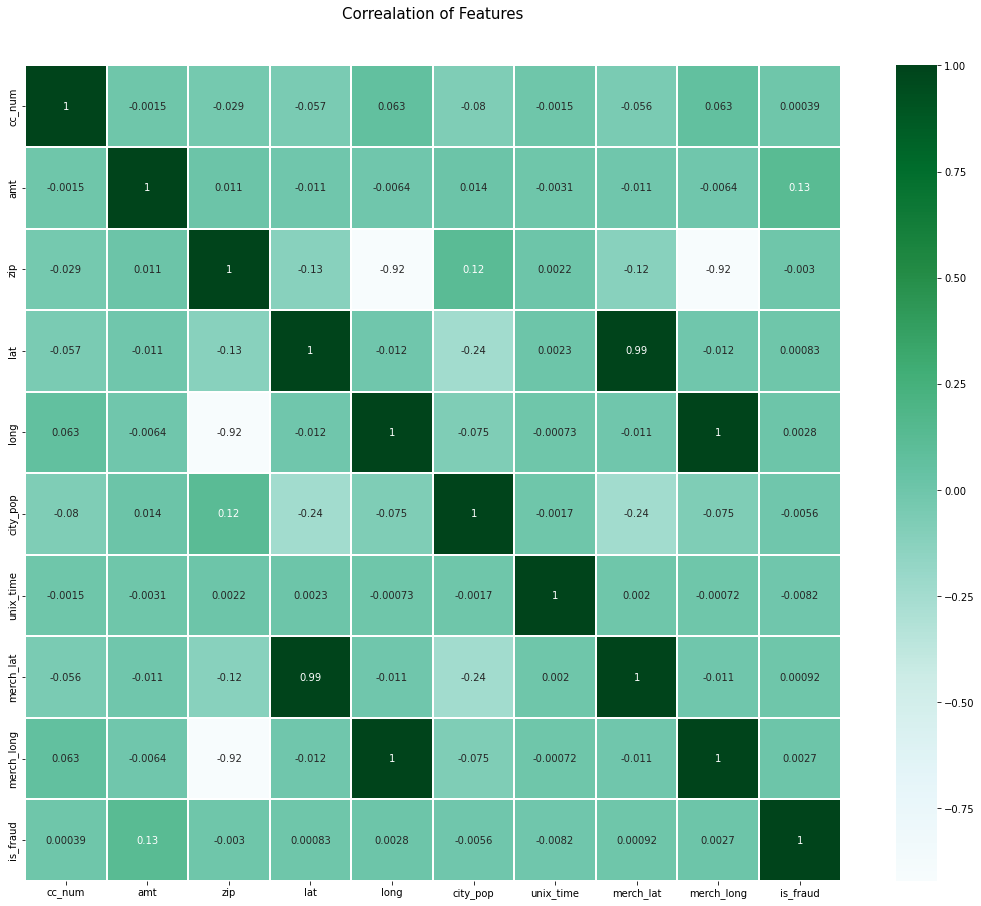

In [10]:
# Before 상관관계표
colormap = plt.cm.BuGn
plt.figure(figsize=(20,15))
plt.title('Correalation of Features', y=1.05, size = 15)
sns.heatmap(fraud_df.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='White', annot=True, annot_kws={'size': 10})

fraud와 연관성 Top3

1. amt(0.13)
2. unix_time(0.0082)
3. zip(0.003)

## 2. Feature Engineering

### 2.1. Distance

신용카드 주소지와 거래 장소의 거리에 따른 거래사기 경향이 발견될 수 있어 lat과 long을 활용해<br/>
두 주소의 차이를 볼 수 있는 [distance]를 만들어보겠습니다.

In [11]:
# 
def haversine(lat1, lon1, lat2, lon2):
    # 지구 반지름(km)
    R = 6371.0

    # 평면각 전환
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # 좌표차이 계산
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula 좌표 사이의 최단거리 계산
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # 거리 차이(km)
    distance = R * c
    return distance

#df에 거리차이 항목 추가
fraud_df['distance'] = fraud_df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
fraudtest_df['distance'] = fraud_df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [12]:
fraud_df['distance'].describe()

count    491134.000000
mean         76.378645
std          29.169541
min           0.123883
25%          55.578144
50%          78.540025
75%          98.766507
max         149.804444
Name: distance, dtype: float64

In [13]:
fraudtest_df['distance'].describe()

count    491134.000000
mean         76.378645
std          29.169541
min           0.123883
25%          55.578144
50%          78.540025
75%          98.766507
max         149.804444
Name: distance, dtype: float64

이상치 없이 거리가 잘 입력된 것으로 보여집니다.

### 2.2. amt
금액을 1(\~100), 2(100 \~ 1000), 3(1000~)으로 나누어 분류하여 금액 단위 별 사기 경향을 볼 수 있는 [amt_rt]를 만들어보겠습니다.

In [14]:
# 금액 단위 별 등급을 매겨주는 함수 정의
def amount_func(x):
    if x < 100 :
        return 1
    elif 100 <= x < 1000 :
        return 2
    else :
        return 3

In [15]:
# amt_rt이라는 column에 저장
fraud_df['amt_rt'] = fraud_df['amt'].apply(amount_func)
fraudtest_df['amt_rt'] = fraud_df['amt'].apply(amount_func)

In [16]:
fraud_df[['amt','amt_rt']]

,amt,amt_rt
0,107.23,2
1,44.71,1
2,46.28,1
3,64.09,1
4,25.58,1
...,...,...
491129,134.26,2
491130,25.49,1
491131,111.84,2
491132,86.88,1


금액 단위 별 등급이 잘 매겨진 것으로 확인됩니다.

### 3.3. Gender
남성을 1 여성을 0으로 변환하여 [gender]에 저장하겠습니다.

In [17]:
fraud_df['gender'] = fraud_df['gender'].map({'M':1, 'F' : 0})
fraudtest_df['gender'] = fraud_df['gender'].map({'M':1, 'F' : 0})

In [18]:
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,distance,amt_rt
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,30.212176,2
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,1,269 Sanchez Rapids,Elizabeth,...,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,84.702120,1
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,0,2481 Mills Lock,Plainfield,...,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,67.847742,1
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,1,61390 Hayes Port,Romulus,...,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,22.303906,1
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,0,50872 Alex Plain Suite 088,Baton Rouge,...,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,79.591943,1


### 3.4. Time
시간 별로 사기 발생 경향을 보기위해 시간부분만 분리하여 [time] column으로 저장하겠습니다.

In [19]:
#형식 변환
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])
fraudtest_df['trans_date_trans_time'] = pd.to_datetime(fraudtest_df['trans_date_trans_time'])

In [20]:
# 시간 추출
fraud_df['time'] = fraud_df['trans_date_trans_time'].dt.hour
fraudtest_df['time'] = fraud_df['trans_date_trans_time'].dt.hour

In [21]:
# 결과 확인
fraud_df[['trans_date_trans_time','time']]

,trans_date_trans_time,time
0,2019-01-01 00:00:44,0
1,2019-01-01 00:12:34,0
2,2019-01-01 00:17:16,0
3,2019-01-01 00:20:15,0
4,2019-01-01 00:23:41,0
...,...,...
491129,2020-12-31 23:56:48,23
491130,2020-12-31 23:56:57,23
491131,2020-12-31 23:59:09,23
491132,2020-12-31 23:59:15,23


시간만 추출되어 저장되었습니다.

### 3.5. dob
출생년도를 추출하여 오늘 날짜 기준 10대 = 1, 20대 = 2, 30대 = 3 등 으로 분류하여 [age_rt]로 저장하겠습니다.

In [22]:
# 형식 변환
fraud_df['dob'] = pd.to_datetime(fraud_df['dob'])
fraudtest_df['dob'] = pd.to_datetime(fraudtest_df['dob'])

In [23]:
# 년도 추출
fraud_df['age_rt'] = fraud_df['dob'].dt.year
fraudtest_df['age_rt'] = fraudtest_df['dob'].dt.year

In [24]:
# 결과 확인
fraud_df[['dob','age_rt']]

,dob,age_rt
0,1978-06-21,1978
1,1980-12-21,1980
2,1974-07-19,1974
3,1971-11-05,1971
4,1977-02-22,1977
...,...,...
491129,1983-02-08,1983
491130,1984-06-03,1984
491131,1999-12-27,1999
491132,1981-11-29,1981


In [25]:
# 년도 범위 확인
fraud_df['age_rt'].describe()

count    491134.000000
mean       1984.384231
std           9.297579
min        1970.000000
25%        1976.000000
50%        1984.000000
75%        1992.000000
max        2004.000000
Name: age_rt, dtype: float64

In [26]:
# 연도 등급 함수 정의
def age_func(x):
    if 2004 <= x :
        return 1
    elif 1994 <= x < 2004 :
        return 2
    elif 1984 <= x < 1994 :
        return 3
    elif 1974 <= x < 1984 :
        return 4
    elif 1964 <= x < 1974 :
        return 5

In [27]:
# age_rt column에 저장
fraud_df['age_rt'] = fraud_df['age_rt'].apply(age_func)
fraudtest_df['age_rt'] = fraudtest_df['age_rt'].apply(age_func)

In [28]:
# 결과 확인
fraud_df[['dob', 'age_rt']]

,dob,age_rt
0,1978-06-21,4
1,1980-12-21,4
2,1974-07-19,4
3,1971-11-05,5
4,1977-02-22,4
...,...,...
491129,1983-02-08,4
491130,1984-06-03,3
491131,1999-12-27,2
491132,1981-11-29,4


나이대 별 등급이 잘 저장되었습니다.

### 3.6. Category
caregory column은 가지수가 많지 않아 one hot encording으로 진행하겠습니다.

In [29]:
fraud_df = pd.get_dummies(fraud_df, columns = ['category'], drop_first = True)
fraudtest_df = pd.get_dummies(fraudtest_df, columns = ['category'], drop_first = True)

### 3.7 Drop

In [30]:
list(fraud_df.columns)

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'distance',
 'amt_rt',
 'time',
 'age_rt',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel']

In [31]:
fraud_df = fraud_df.drop(columns = ['trans_date_trans_time','cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state','zip', 'lat', 'long', 'city_pop','job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'])
fraudtest_df = fraudtest_df.drop(columns = ['trans_date_trans_time','cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state','zip', 'lat', 'long', 'city_pop','job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'])

In [32]:
fraud_df.head()

,amt,gender,is_fraud,distance,amt_rt,time,age_rt,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,107.23,0,0,30.212176,2,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0
1,44.71,1,0,84.702120,1,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0
2,46.28,0,0,67.847742,1,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0
3,64.09,1,0,22.303906,1,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0
4,25.58,0,0,79.591943,1,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0


## 4. EDA

<AxesSubplot:title={'center':'Correalation of Features'}>

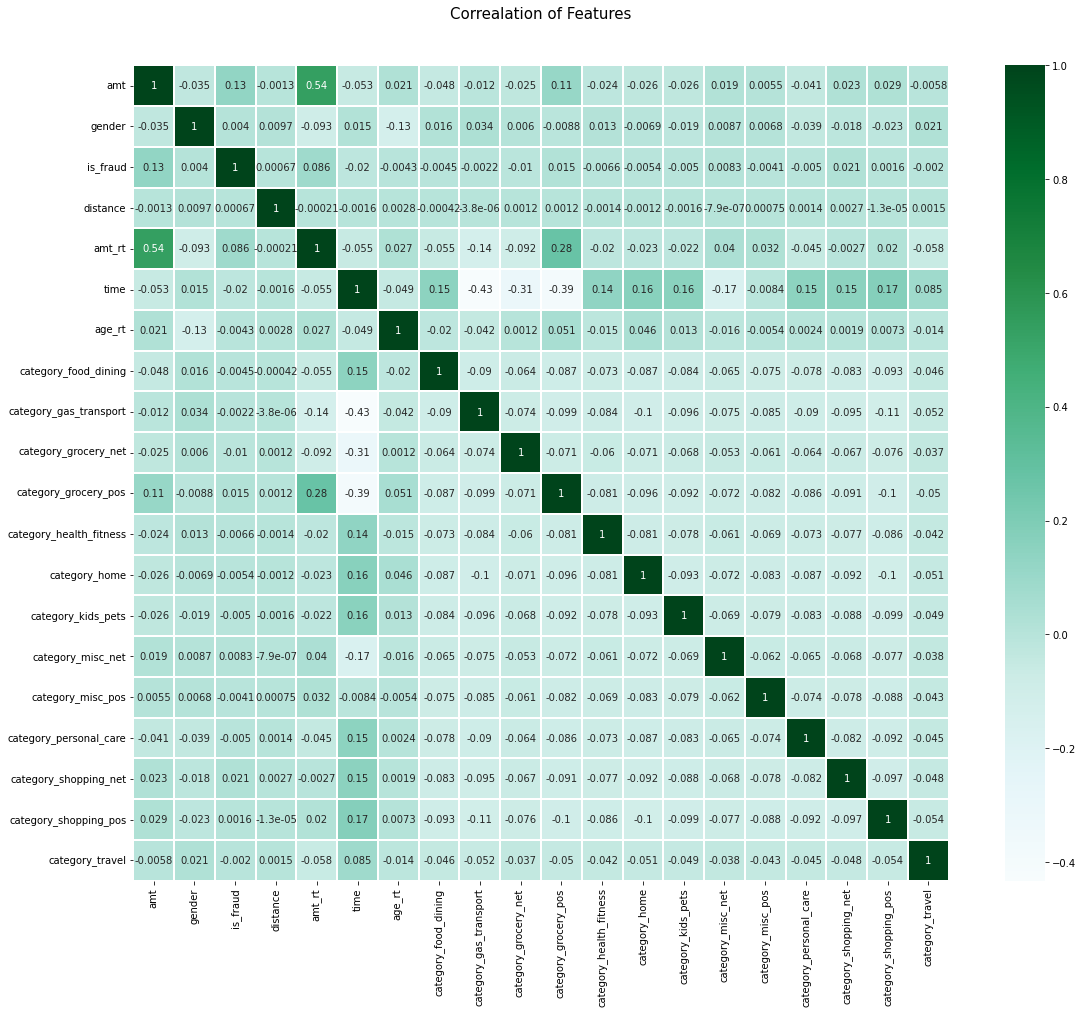

In [33]:
# After 상관관계 
colormap = plt.cm.BuGn
plt.figure(figsize=(20,15))
plt.title('Correalation of Features', y=1.05, size = 15)
sns.heatmap(fraud_df.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='White', annot=True, annot_kws={'size': 10})

fraud와 연관성 Top3
1. amt (0.13)
2. amt_rt (0.086)
3. time (0.02)

### 4.1. Gender

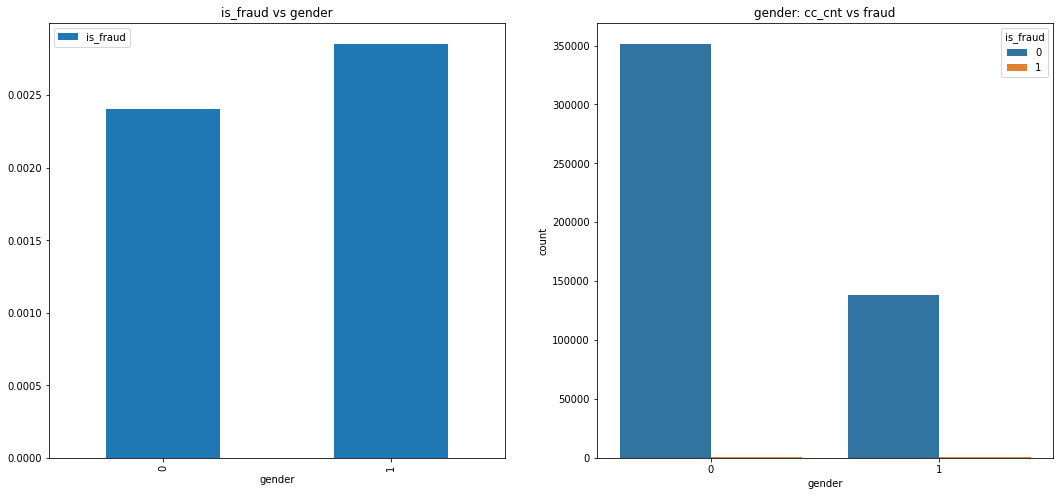

In [34]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
fraud_df[['gender', 'is_fraud']].groupby(['gender'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('is_fraud vs gender')
sns.countplot(x= 'gender', hue='is_fraud', data=fraud_df, ax=ax[1])
ax[1].set_title('gender: cc_cnt vs fraud')
plt.show()

In [35]:
# 사기 발생 비율
fraud_df.groupby('gender')['is_fraud'].mean()

gender
0    0.002406
1    0.002855
Name: is_fraud, dtype: float64

신용카드 사용 비중은 여성이 남성의 2배 이상 높음에도 <br/>
거래 사기 비중은 남성이 여성보다 더 높아 성별 대비 남성의 거래 사기 비중이 높은 것을 확인할 수 있습니다.

### 4.2. Time

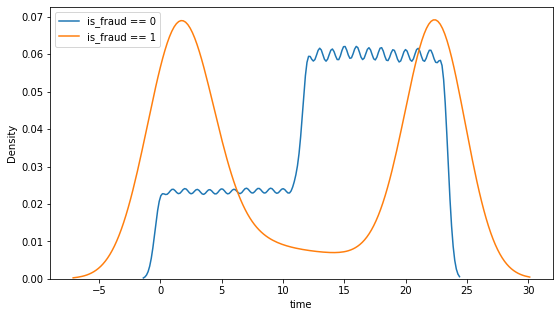

In [36]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(fraud_df[(fraud_df['is_fraud'] == 0)]['time'], ax=ax)
sns.kdeplot(fraud_df[(fraud_df['is_fraud'] == 1)]['time'], ax=ax)
plt.legend(['is_fraud == 0', 'is_fraud == 1'])
plt.show()

In [37]:
# 사기 발생 비율
fraud_df.groupby('time')['is_fraud'].mean()

time
0     0.011446
1     0.010837
2     0.012185
3     0.013010
4     0.001232
5     0.001479
6     0.000702
7     0.001727
8     0.001214
9     0.000951
10    0.000958
11    0.000613
12    0.000238
13    0.000544
14    0.000137
15    0.000236
16    0.000338
17    0.000136
18    0.000305
19    0.000411
20    0.000445
21    0.000374
22    0.008846
23    0.008121
Name: is_fraud, dtype: float64

거래사기 발생 시간은 높은 비중으로 00 ~ 5시 발생하는 것을 확인할 수 있습니다.

### 4.3. Amount

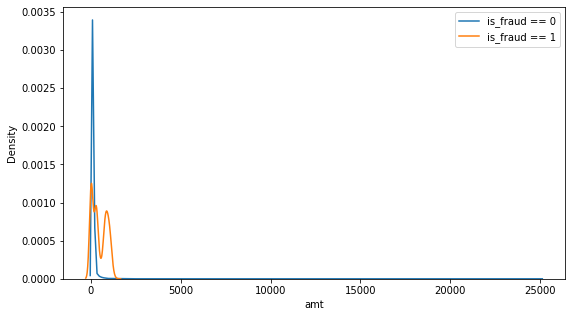

In [38]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(fraud_df[(fraud_df['is_fraud'] == 0)]['amt'], ax=ax)
sns.kdeplot(fraud_df[(fraud_df['is_fraud'] == 1)]['amt'], ax=ax)
plt.legend(['is_fraud == 0', 'is_fraud == 1'])
plt.show()

amt로 확인하였을 때 가장 거래량이 많은 금액대에 거래사기가 가장 많이 발생하고 <br/>
해당 금액대 이후 거래량 대비 높은 거래사기가 발생한 것을 확인할 수 있는데,

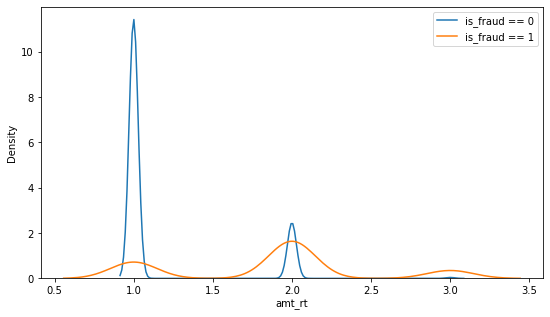

In [39]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(fraud_df[(fraud_df['is_fraud'] == 0)]['amt_rt'], ax=ax)
sns.kdeplot(fraud_df[(fraud_df['is_fraud'] == 1)]['amt_rt'], ax=ax)
plt.legend(['is_fraud == 0', 'is_fraud == 1'])
plt.show()

In [40]:
# 사기 발생 비율
fraud_df.groupby('amt_rt')['is_fraud'].mean()

amt_rt
1    0.000823
2    0.008633
3    0.099813
Name: is_fraud, dtype: float64

금액을 구간으로 나누었을 때 100\~1000 구간의 거래사기 수가 가장 많으며<br/>
1000\~ 이상 구간 사기 발생 비율이 10배 이상 높은 것으로 확인됩니다.

## 4. Distance

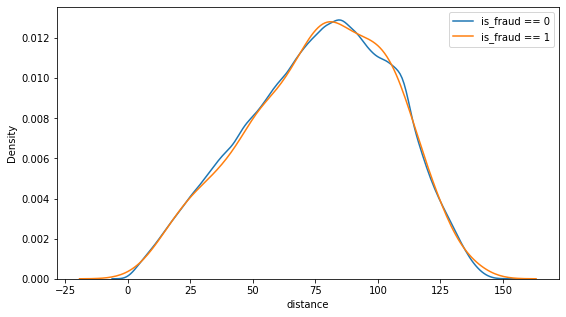

In [41]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(fraud_df[(fraud_df['is_fraud'] == 0)]['distance'], ax=ax)
sns.kdeplot(fraud_df[(fraud_df['is_fraud'] == 1)]['distance'], ax=ax)
plt.legend(['is_fraud == 0', 'is_fraud == 1'])
plt.show()

거의 유사한 그래프 모양이지만 <br/>
25 ~ 50 km 거리에는 사기 발생율이 미세하게 저조하고<br/>
100 ~ 110 km 구간에서는 사기 발생율이 조금 더 높은 것을 확인할 수 있습니다.

## 5. Age

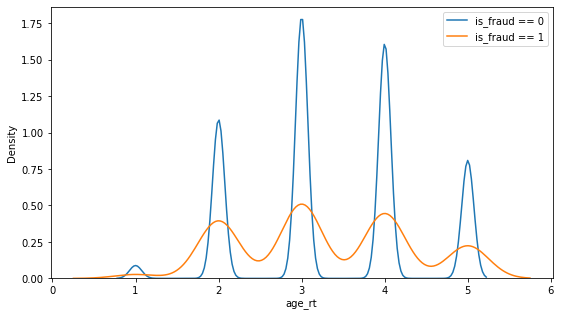

In [42]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(fraud_df[(fraud_df['is_fraud'] == 0)]['age_rt'], ax=ax)
sns.kdeplot(fraud_df[(fraud_df['is_fraud'] == 1)]['age_rt'], ax=ax)
plt.legend(['is_fraud == 0', 'is_fraud == 1'])
plt.show()

In [43]:
# 사기 발생 비율
fraud_df.groupby('age_rt')['is_fraud'].mean()

age_rt
1    0.002613
2    0.003092
3    0.002422
4    0.002360
5    0.002362
Name: is_fraud, dtype: float64

이용자 수는 30대가 가장 높아 거래사기 수도 높지만 <br/>
거래사기 발생 비율을 20대 > 10대 > 30대 순서로 나이가 어린 이용자층에서 사기 발생 비율이 높습니다.

In [44]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

from sklearn.decomposition import PCA
pca = PCA()

## Scaling, PCA

In [45]:
# 스텐다드 스케일링
ss_df = ss.fit_transform(fraud_df)

In [46]:
#PCA
pca = PCA()
pca.fit(ss_df)

PCA()

In [47]:
pd.DataFrame(pca.transform(ss_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.727933,0.889971,-1.072427,-0.679931,-0.348785,-0.661968,-0.279648,-0.429414,0.562444,-0.406024,-0.731090,0.188381,-0.829478,0.757020,-1.639781,-0.876343,-0.637896,-0.611165,-0.437318,0.014525
1,2.562923,-0.934982,-0.159342,-0.947215,-0.620163,-0.471696,-0.196418,-0.484448,0.467448,-0.478042,-0.687199,0.893371,-0.632445,-1.236530,-1.153724,-2.069317,0.355623,0.826938,-0.454681,0.059670
2,1.806180,-2.270176,-1.661365,0.380760,0.140982,-0.352089,-0.565638,-1.234169,-2.445815,-1.097751,0.270459,0.855668,1.728290,0.821734,0.397299,0.836619,0.238359,-0.078498,-0.315611,0.028222
3,2.663918,-0.798663,-0.740125,-0.900079,-0.634795,-0.436534,-0.132991,-0.536441,0.473504,-0.505938,-0.772049,0.568064,-0.825249,0.618022,-2.090639,-2.472948,1.095018,0.864654,-0.409150,0.058256
4,1.133353,-0.943496,-0.423819,-0.416916,-0.250417,-0.454985,-0.306457,1.444363,-2.245752,2.226480,-1.327176,-0.795588,-0.522045,0.269308,0.659357,-0.563220,-0.282582,0.381436,-1.516459,0.215033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,-0.333144,2.191809,-1.496628,-1.001180,-1.400617,2.137257,0.406470,0.360745,0.379595,0.284162,0.429787,0.119439,0.602416,-0.574267,0.414235,0.971362,-0.061844,-1.206103,0.446269,-0.208398
491130,-1.410806,0.765877,0.069385,2.779862,-1.046531,-0.171913,0.001573,-0.348142,-0.198332,-0.077708,-0.086909,0.064394,-0.191073,-1.643057,0.716700,-0.153286,-0.815199,0.213337,0.479723,-0.156991
491131,-0.621127,1.660754,1.306526,-0.781871,0.594280,-1.565994,2.798273,0.127244,0.323562,0.211846,0.486608,0.852760,1.171434,-1.339927,-0.531769,0.636693,0.449935,-1.393952,0.268760,-0.217274
491132,-1.349840,0.709145,-1.122119,-0.264770,1.017441,-1.494835,2.704308,-0.123334,0.222484,0.185660,0.185037,0.016759,0.287299,-0.071864,0.324434,0.047213,0.126931,0.435139,0.520232,-0.158179


In [48]:
#PCA 시각화
import matplotlib.pyplot as plt 

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

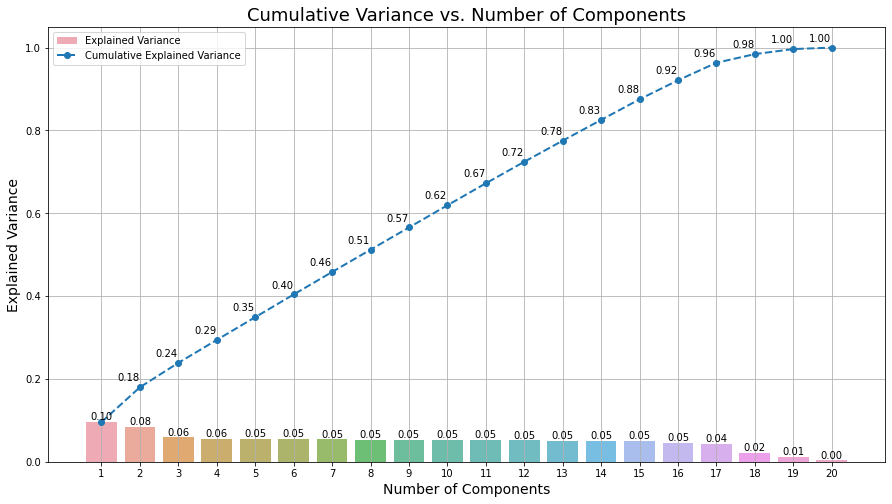

In [49]:
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [50]:
# 민맥스 스케일링
mm_df = mm.fit_transform(fraud_df)

In [51]:
pca = PCA()
pca.fit(mm_df)

PCA()

In [52]:
pd.DataFrame(pca.transform(mm_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.337755,0.822483,0.587788,-0.575483,0.012710,0.021652,0.024788,-0.021556,-0.145947,0.050053,0.040942,-0.162736,-0.004030,0.308372,0.105940,-0.006710,0.117920,0.007056,-0.012233,-0.004827
1,0.681252,0.777023,0.539420,-0.529545,0.023423,0.034044,0.034527,0.016251,-0.183602,0.000624,-0.096486,-0.117475,-0.076606,-0.048120,-0.294361,-0.141323,0.110800,0.018374,-0.001265,0.001387
2,-0.285303,0.546650,-0.010502,0.011836,0.018468,0.007242,-0.024534,0.000456,0.163683,-0.147240,-0.326265,0.776276,-0.557706,0.058767,0.107170,0.000746,0.029581,-0.002640,-0.001144,0.000026
3,0.652913,0.783118,0.555963,-0.557397,0.052074,0.050159,0.059585,0.022199,-0.205620,-0.050840,-0.322409,-0.162811,-0.050497,0.370802,-0.291155,-0.130691,0.099805,0.017641,-0.000864,0.002062
4,-0.284338,0.416388,-0.015481,-0.038667,-0.032830,-0.025432,-0.112728,0.040177,0.828103,-0.468940,-0.115491,-0.183334,-0.066331,-0.020273,-0.111272,-0.203684,0.380612,0.051236,-0.002979,0.000219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,-0.322365,-0.406366,-0.198827,-0.357167,0.811380,0.082488,0.142301,-0.033509,-0.055655,-0.008880,0.053434,-0.113059,0.069222,-0.148333,0.369995,0.123978,-0.116279,-0.049109,-0.009883,-0.004334
491130,-0.287676,-0.497404,0.592198,0.606131,0.132568,0.033588,0.052694,-0.021178,-0.041700,0.013832,0.113198,-0.015179,-0.039237,-0.342797,-0.111592,-0.018742,-0.135063,-0.034225,0.001900,-0.000299
491131,0.710944,-0.412251,-0.070526,-0.189783,-0.459492,0.711687,0.314081,-0.018066,-0.075360,0.024149,0.348321,-0.056411,0.034730,-0.160327,0.412905,0.098374,-0.074987,-0.051593,-0.012195,-0.005284
491132,-0.305356,-0.401996,-0.202025,-0.111109,-0.409043,0.734562,0.320547,-0.038829,-0.106376,-0.057631,-0.077640,-0.067971,-0.011248,-0.031435,-0.069321,-0.009827,-0.138108,-0.037955,0.002719,0.002679


In [53]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

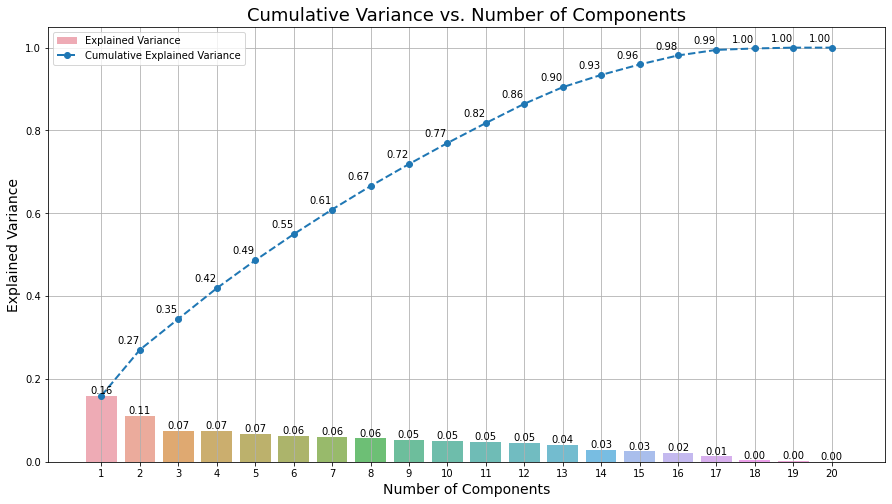

In [54]:
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [55]:
# 로버스트 스케일링
rs_df = rs.fit_transform(fraud_df)

In [56]:
#PCA
pca = PCA()
pca.fit(rs_df)

PCA()

In [57]:
pd.DataFrame(pca.transform(rs_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.665779,-0.769596,-1.590814,1.085037,-0.368573,-0.971710,0.028679,-0.009766,-0.017788,0.035210,0.088615,0.012354,0.221632,0.069301,0.212581,0.003910,-0.045152,0.063242,0.002346,-0.007301
1,-0.310212,-0.710027,-1.606667,-0.188151,0.732367,-0.396899,0.010725,-0.031809,-0.030257,0.136264,0.446630,0.164069,0.281118,0.118984,0.426255,0.152824,-0.095595,0.042002,0.014503,-0.002843
2,-0.297766,-0.761229,-1.535191,0.213587,-0.205368,0.266030,-0.013883,-0.007087,-0.021812,0.115234,0.491936,0.157550,-0.206102,-0.038654,-0.448911,-0.602737,0.126057,-0.068852,-0.005796,-0.001045
3,-0.027279,-1.696473,-1.525496,1.258048,0.826318,-0.370661,0.007955,-0.044811,-0.036186,0.142506,0.439249,0.161462,0.278419,0.120738,0.426054,0.157050,-0.087442,0.036505,0.014267,-0.003076
4,-0.583370,-0.761501,-1.456035,-0.058812,-0.221670,0.127557,0.028309,-0.044932,-0.040573,0.129733,0.109171,0.069330,-0.872542,-0.296895,0.308929,0.012931,-0.360643,0.270457,0.042304,-0.003140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,0.974743,-0.592244,1.053968,-0.503935,-0.332407,-0.540539,0.358268,0.824770,0.129666,-0.224649,-0.279108,-0.125850,0.025570,-0.089758,-0.156869,-0.137611,0.078501,-0.076109,-0.046492,-0.005236
491130,-0.643043,0.397570,0.975509,-1.185177,-0.320419,0.107633,-0.870186,0.129878,0.035420,-0.052409,0.095035,0.011353,0.065411,0.000471,0.099280,0.038129,0.058760,-0.107141,-0.031459,0.001905
491131,0.630242,1.471757,0.906791,-0.566428,0.481858,-0.735836,0.194445,-0.417134,0.748144,-0.405289,-0.249527,-0.092593,0.062717,-0.140639,-0.189859,-0.169987,0.029279,-0.051994,-0.049972,-0.006552
491132,0.218291,-0.583410,1.050163,-0.103656,-0.208154,0.210226,0.203467,-0.447068,0.720348,-0.256660,0.149259,0.004429,0.101305,-0.036704,0.084600,0.028909,0.043083,-0.107553,-0.033919,0.000040


In [58]:
#PCA 시각화
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

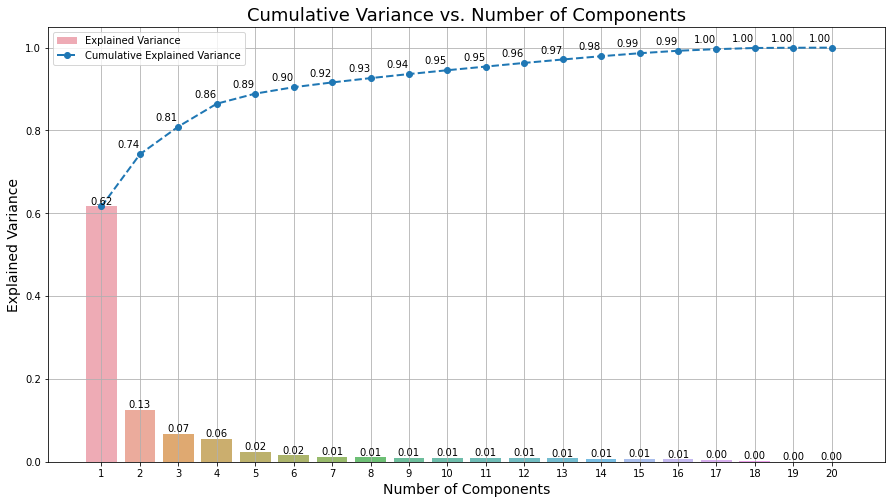

In [59]:
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

스케일링을 진행 후 PCA를 진행하였을 때 Robust Scaling이 많은 정보를 효과적으로 포함하고 있는 것으로 확인됩니다.

## 6. Modeling

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [61]:
X_train = fraud_df.drop('is_fraud', axis=1).values
target_label = fraud_df['is_fraud'].values
X_test = fraudtest_df.values

In [62]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size=0.3, random_state=2023)

In [63]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [64]:
prediction = model.predict(X_vid)

In [65]:
print('총 {}명 중 {:.2f}% 정확도로 사기 맞츰'.format(y_vid.shape[0], 100*metrics.accuracy_score(prediction, y_vid)))

총 147341명 중 99.89% 정확도로 사기 맞츰


## 5. 회고

처음 law data를 확인했을 때 어떻게 진행해야할지 감을 잡지 못해 시간을 많이 빼앗겼는데<br/>
단계별로 진행하며 잘하고 있는 것이 맞는지에 대한 의구심과 Feature Engineering 과정에서도 새로 만들어낸 데이터가 기존 데이터보다 유효한 데이터인지 자세하게 비교해보지 못해 아쉬웠습니다.<br/>
처음 접했을 때보다는 전처리 과정이 익숙해져 빠르게 진행되었지만 혼자서만 진행하다보니 방향성을 잘 잡지 못하여 kaggle에서 다른 사람들이 분석한 내용을 비교해보며 부족한 부분을 많이 채워야하겠다는 필요성을 절실하게 느꼈습니다. <br/>
<br/>
Scaling과 CPA 부분은 아직 정확한 개념을 이해하지 못해 현재 분석한 내용이 맞는건지, 이 내용 외적으로 어떻게 사용되어야하는건지에 대해서도 궁금증이 있는데, 이번 주말에 이번 주간 배웠던 부분에 대한 자료를 더 찾아봐야할 것 같습니다.
<br/>
오늘은 시간이 여유가 있어 kaggle에 있는 test 파일을 적용해 모델을 돌려봤는데, 99% 정확도가 나왔는데 기분은 좋지만 뭔가 문제가 있는 것 같습니다 ㅎㅎ,,